In [1]:
import sys
sys.path.append('./paralel_planarity_criterion')

Testing Planar Graph:
Nodes: [0, 1, 2, 3, 4, 5]
Edges: [(0, 5), (0, 4), (0, 1), (1, 2), (1, 4), (1, 3), (3, 4), (4, 5)]


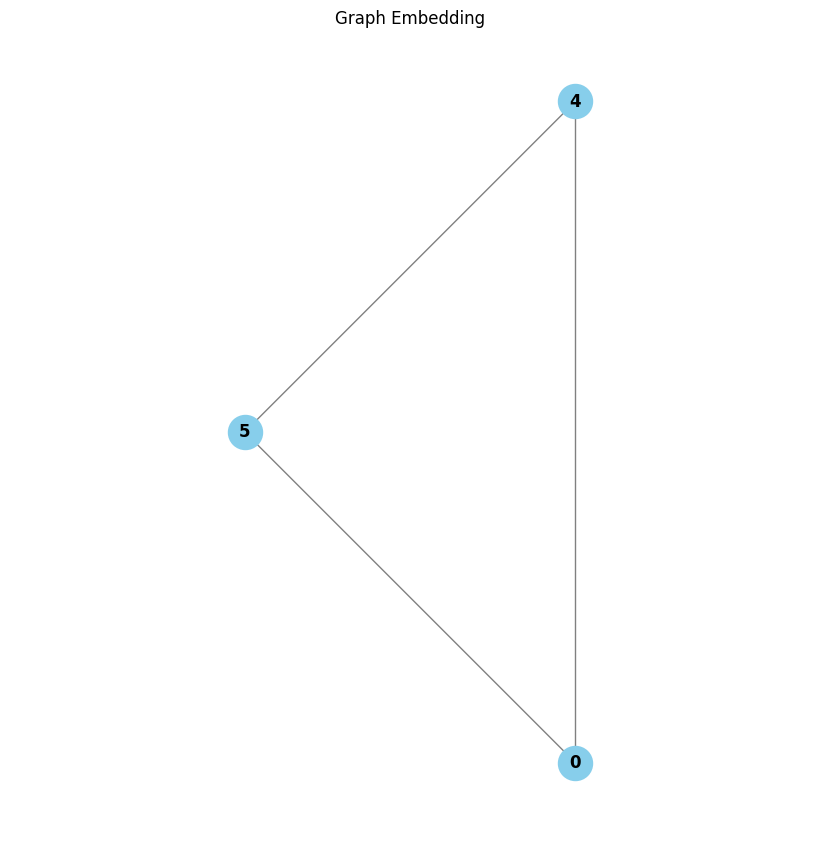

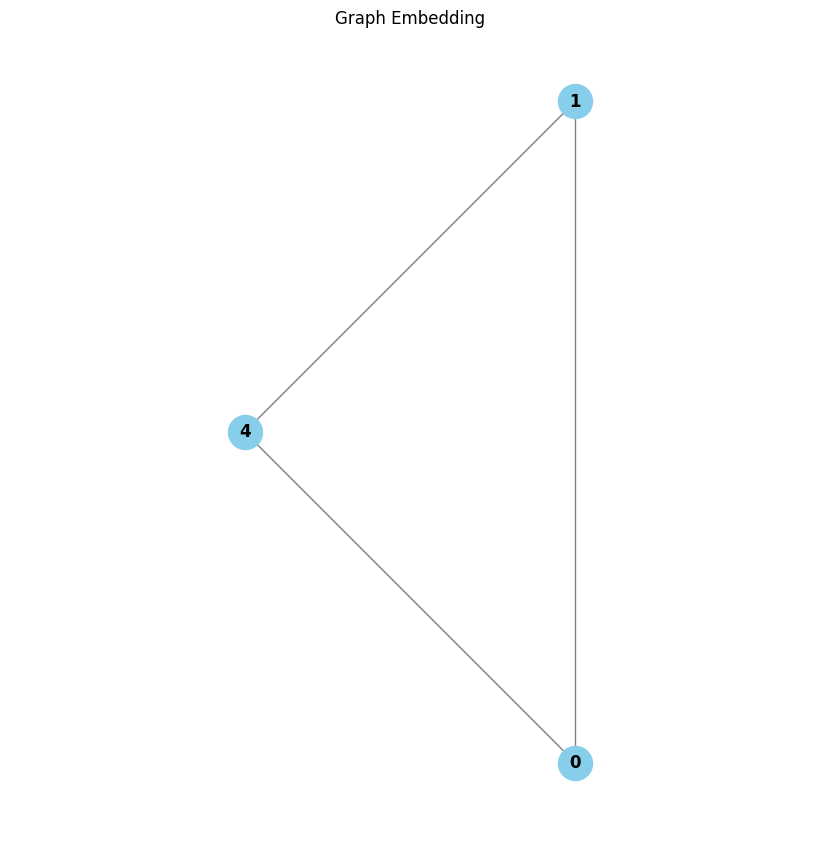

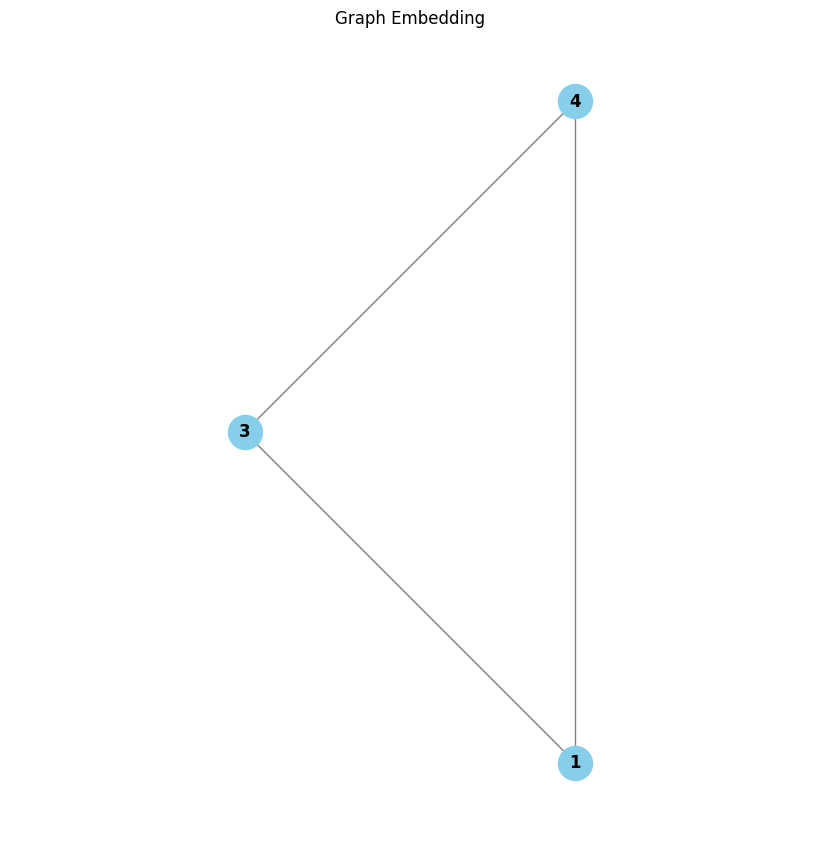


Testing Non-Planar Graph:
Nodes: [0, 1, 2, 3, 4, 5, 6, 7]
Edges: [(0, 3), (0, 4), (1, 3), (1, 6), (1, 7), (2, 7), (2, 3), (2, 6), (3, 7), (3, 5), (4, 6), (4, 7), (6, 7)]


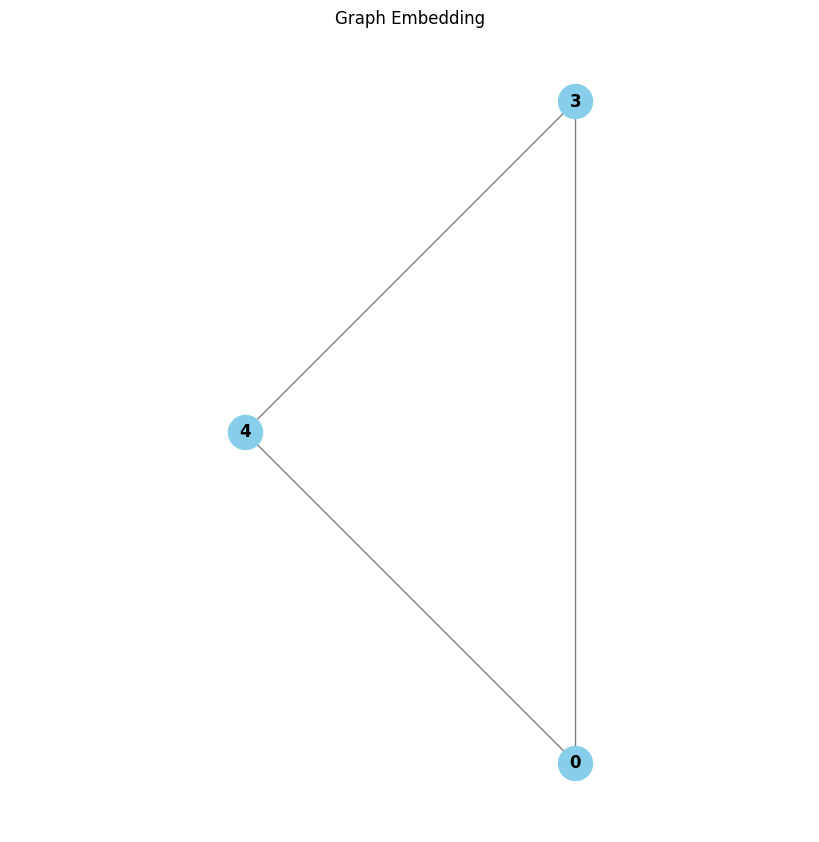

In [2]:
import networkx as nx
import random
import planar_printer


# Set a fixed seed for reproducibility
seed = 41

# === Planar graph ===
# We'll generate a random graph and filter until we get one planar graph
random.seed(seed)
planar_graph = None
trials = 0
while planar_graph is None:
    n = random.randint(5, 10)
    m = random.randint(n, n * (n - 1) // 2)
    G = nx.gnm_random_graph(n, m, seed=seed + trials)
    is_planar, _ = nx.check_planarity(G)
    if is_planar:
        planar_graph = G
    trials += 1

# === Non-planar graph ===
# Similarly generate a non-planar graph
random.seed(seed + 1000)
nonplanar_graph = None
trials = 0
while nonplanar_graph is None:
    n = random.randint(5, 10)
    m = random.randint(n, n * (n - 1) // 2)
    G = nx.gnm_random_graph(n, m, seed=seed + 1000 + trials)
    is_planar, _ = nx.check_planarity(G)
    if not is_planar:
        nonplanar_graph = G
    trials += 1

# === Test Planar Graph ===
print("Testing Planar Graph:")
print("Nodes:", planar_graph.nodes())
print("Edges:", planar_graph.edges())
planar_list, coordinates = planar_printer.get_embbeding(planar_graph)
#print(info["failing tcc"].nodes(), info["failing tcc"].edges())

# === Test Non-Planar Graph ===
print("\nTesting Non-Planar Graph:")
print("Nodes:", nonplanar_graph.nodes())
print("Edges:", nonplanar_graph.edges())
planar_list, coordinates = planar_printer.get_embbeding(nonplanar_graph)


Testing Planar Graphs:
nodos grafo: [0, 1, 2, 3, 4, 5, 6]
edges grafo: [(0, 4), (0, 2), (0, 6), (1, 6), (1, 5), (2, 4), (2, 3), (3, 5), (3, 6), (4, 6)]


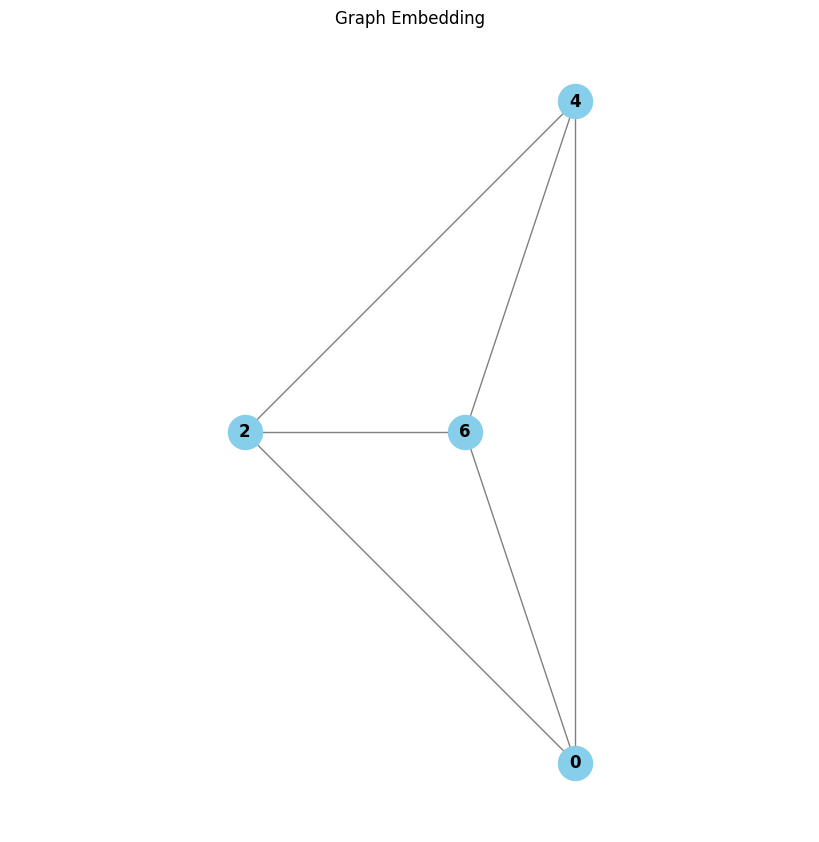

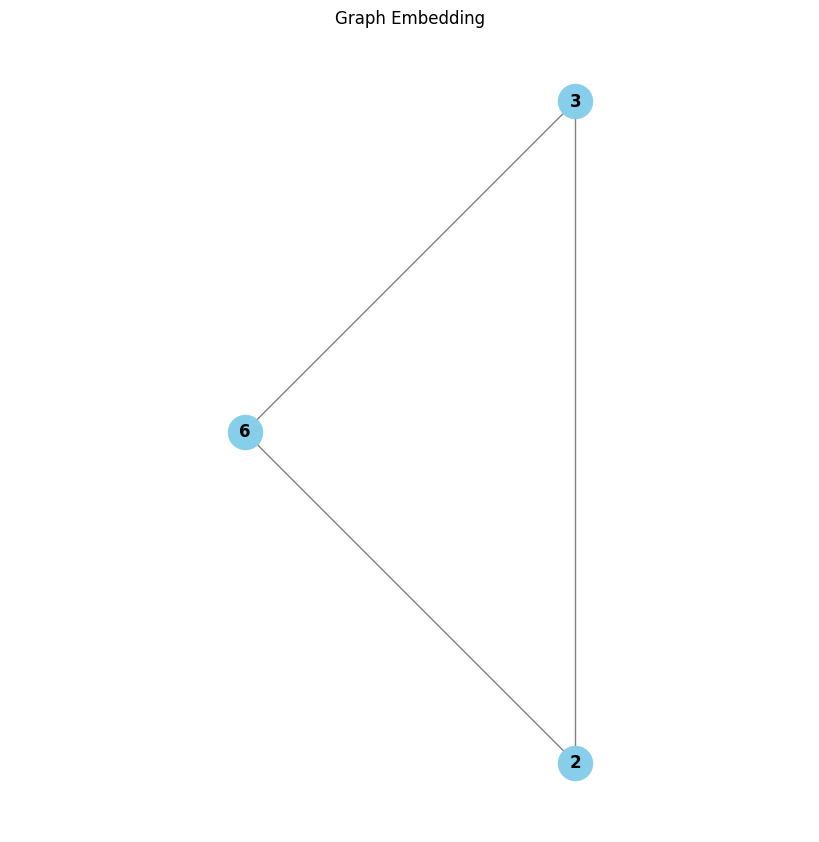

nodos grafo: [0, 1, 2, 3, 4]
edges grafo: [(0, 4), (0, 2), (0, 1), (1, 4), (2, 4)]


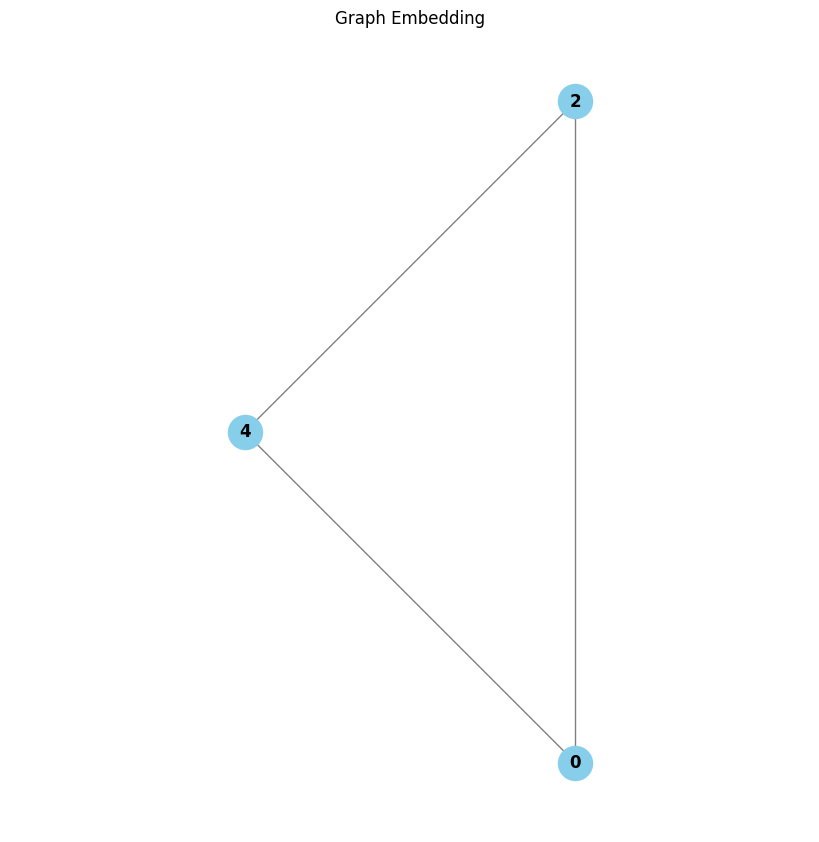

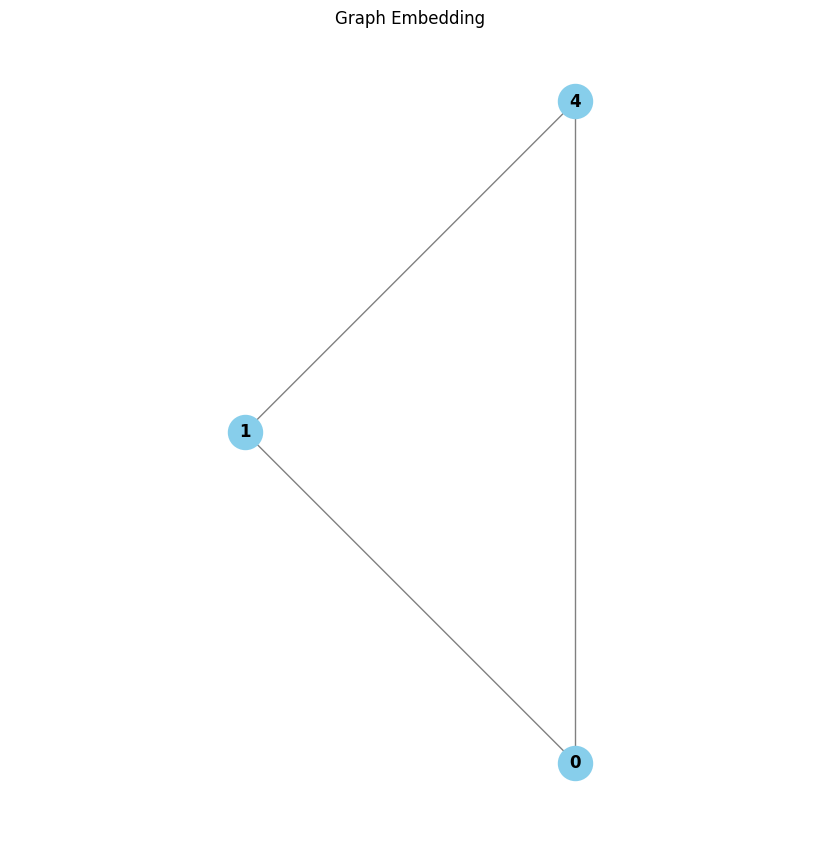

nodos grafo: [0, 1, 2, 3, 4, 5, 6]
edges grafo: [(0, 5), (0, 3), (0, 6), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (4, 6), (5, 6)]


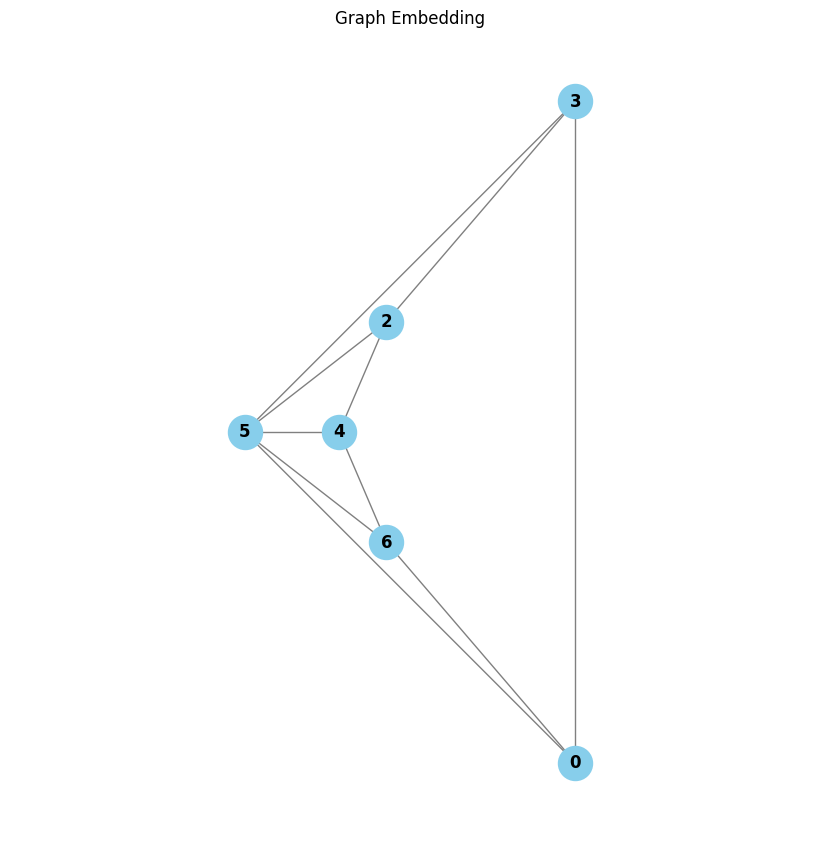

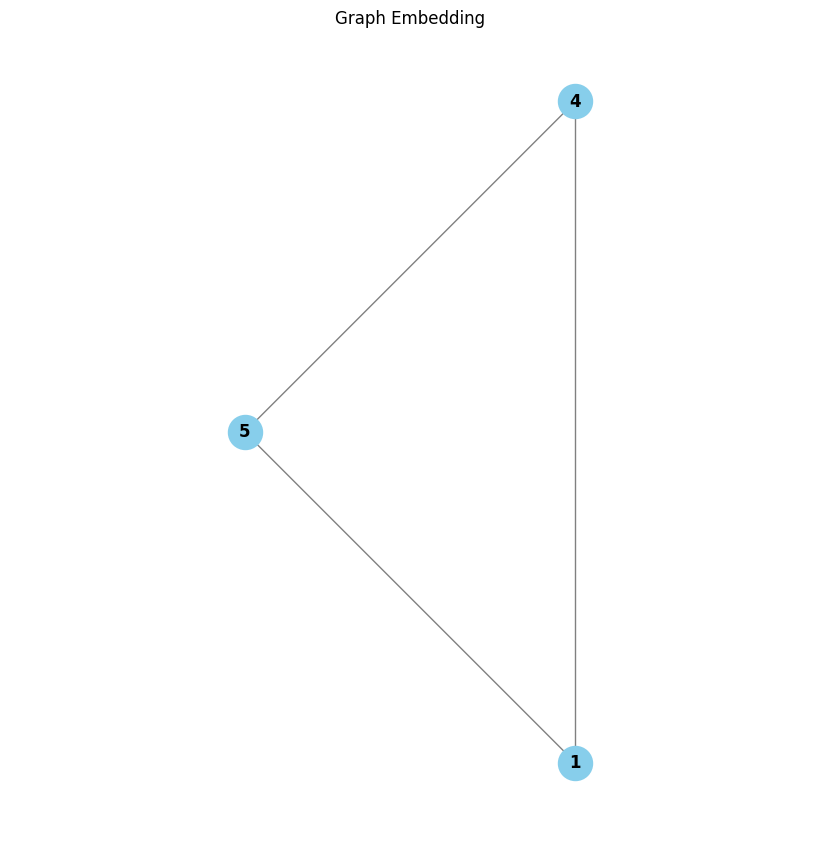

nodos grafo: [0, 1, 2, 3, 4, 5, 6, 7]
edges grafo: [(0, 5), (0, 3), (0, 4), (1, 6), (1, 2), (1, 4), (1, 3), (1, 7), (2, 6), (2, 7), (3, 6), (4, 5), (5, 6)]


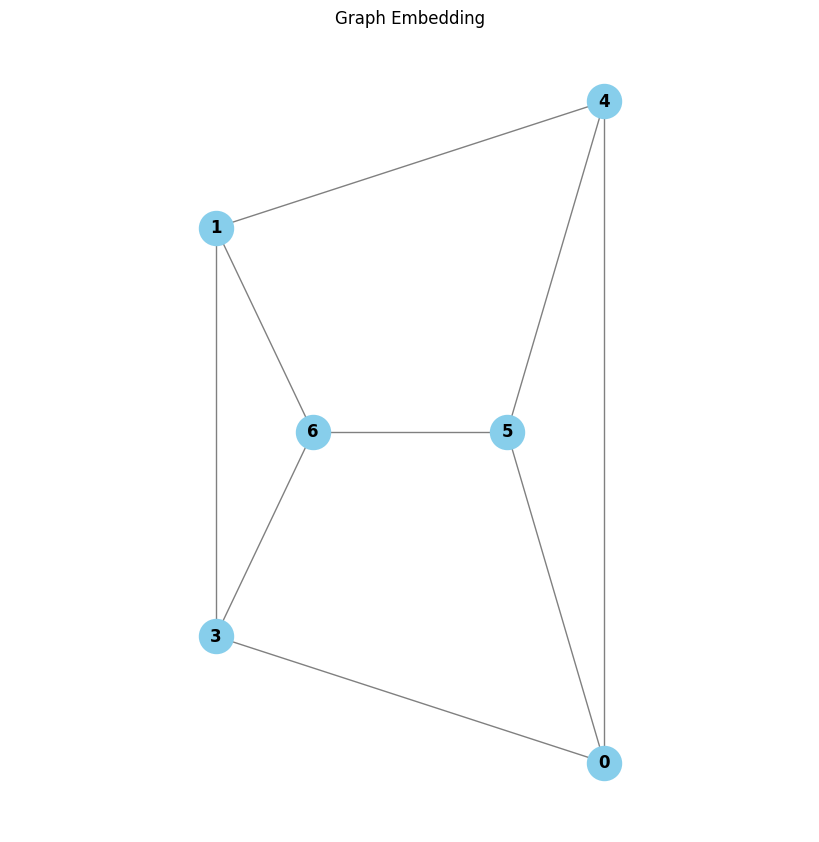

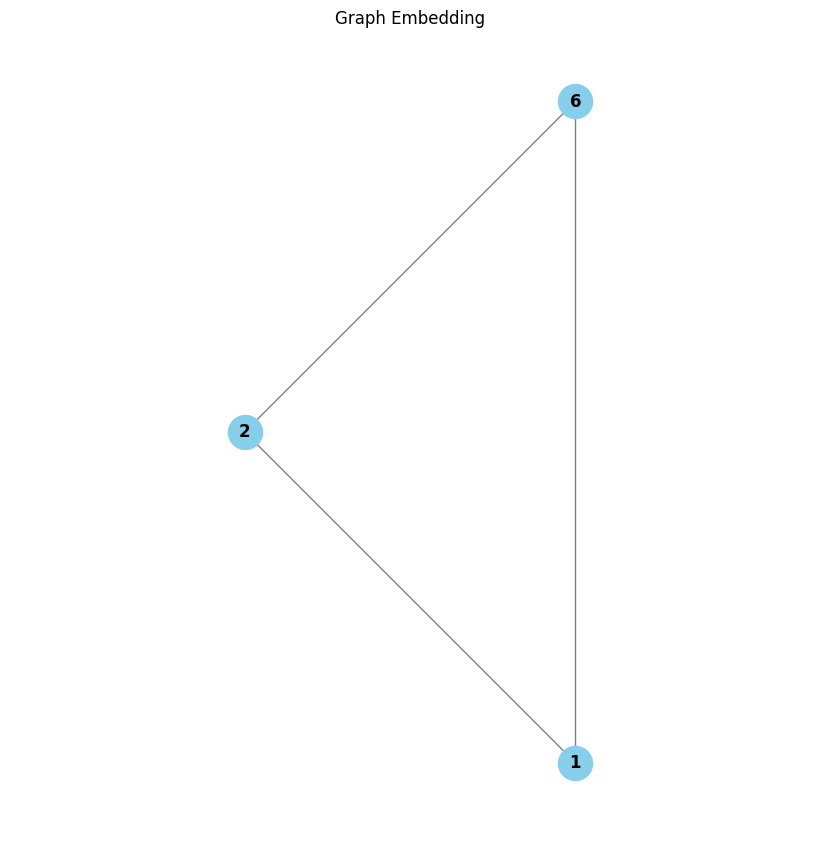

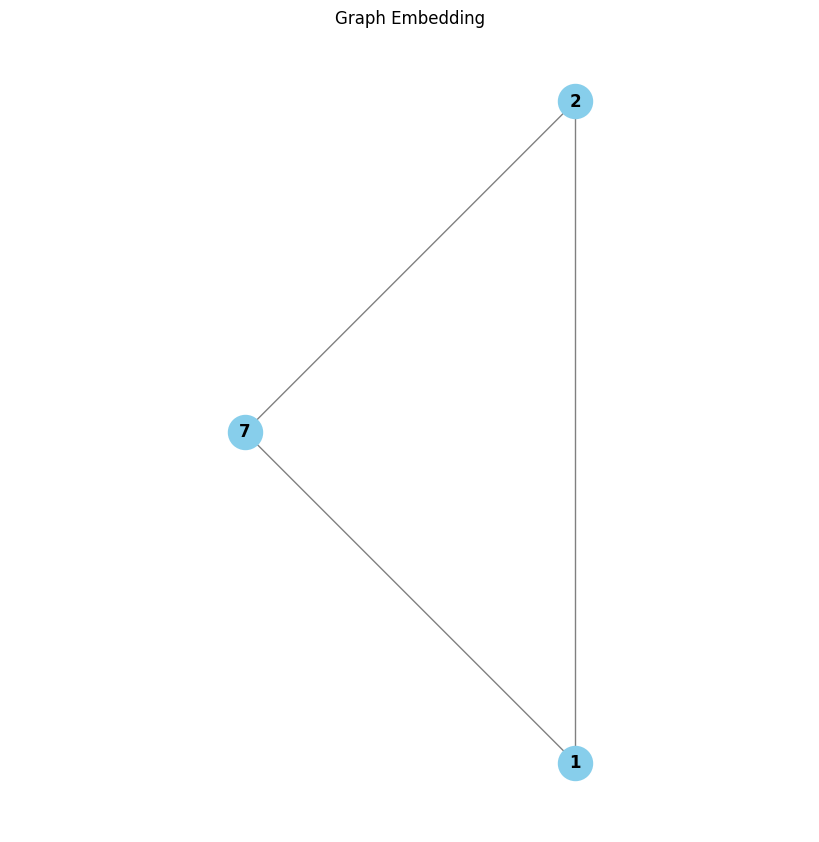

nodos grafo: [0, 1, 2, 3, 4, 5]
edges grafo: [(0, 5), (0, 2), (0, 4), (1, 5), (1, 2), (2, 4), (2, 3), (2, 5), (4, 5)]


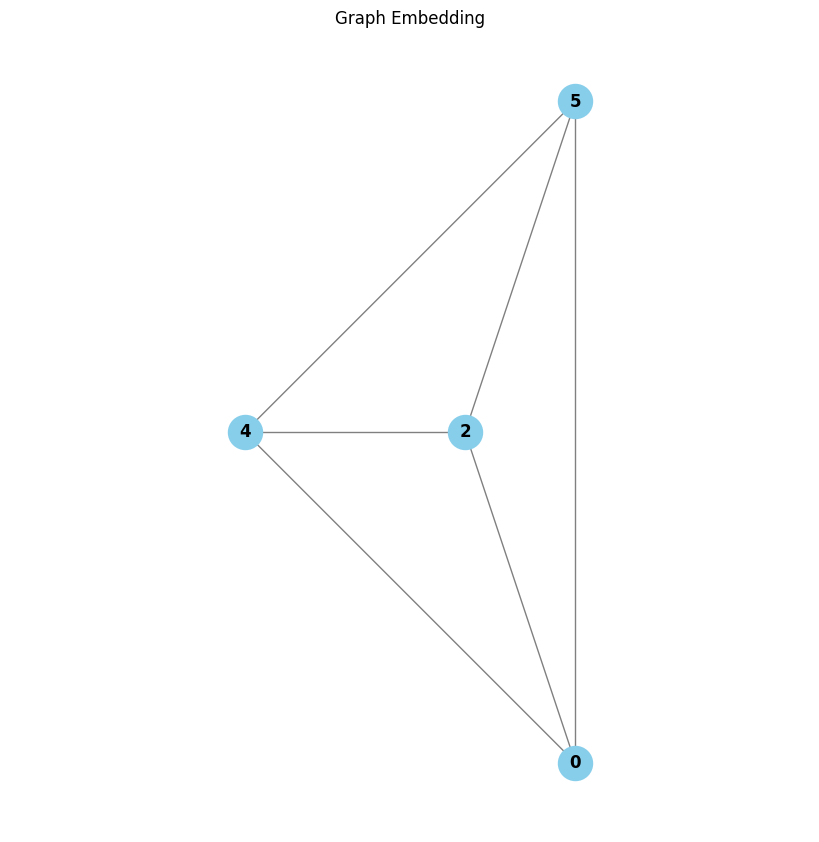

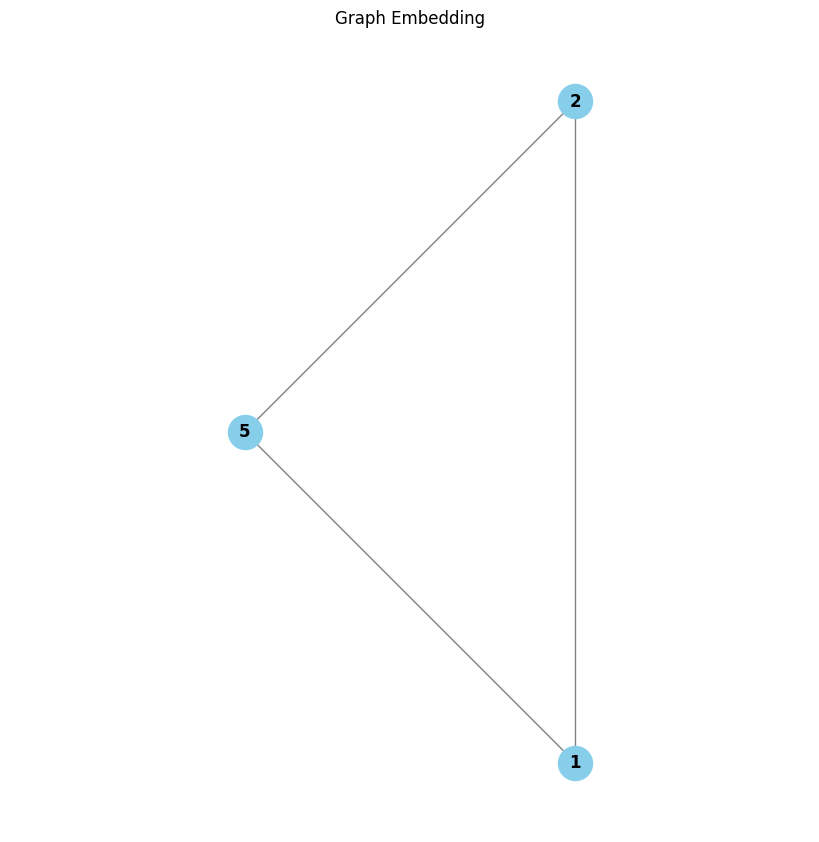

nodos grafo: [0, 1, 2, 3, 4, 5, 6, 7]
edges grafo: [(0, 5), (0, 4), (0, 1), (1, 6), (2, 3), (3, 6), (4, 6), (4, 5), (5, 6), (6, 7)]


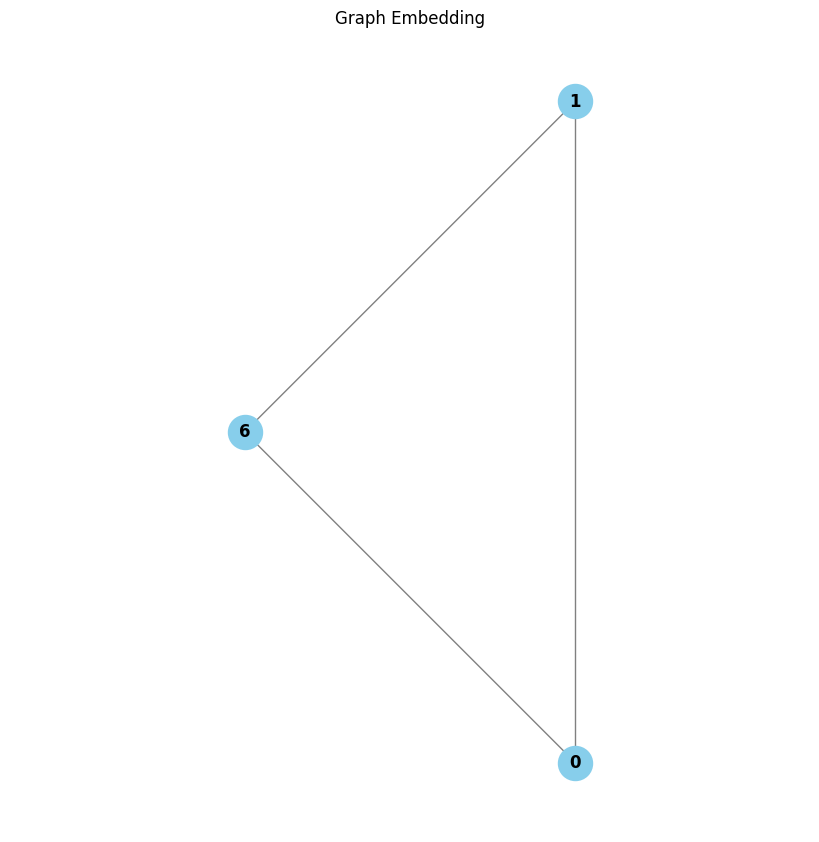

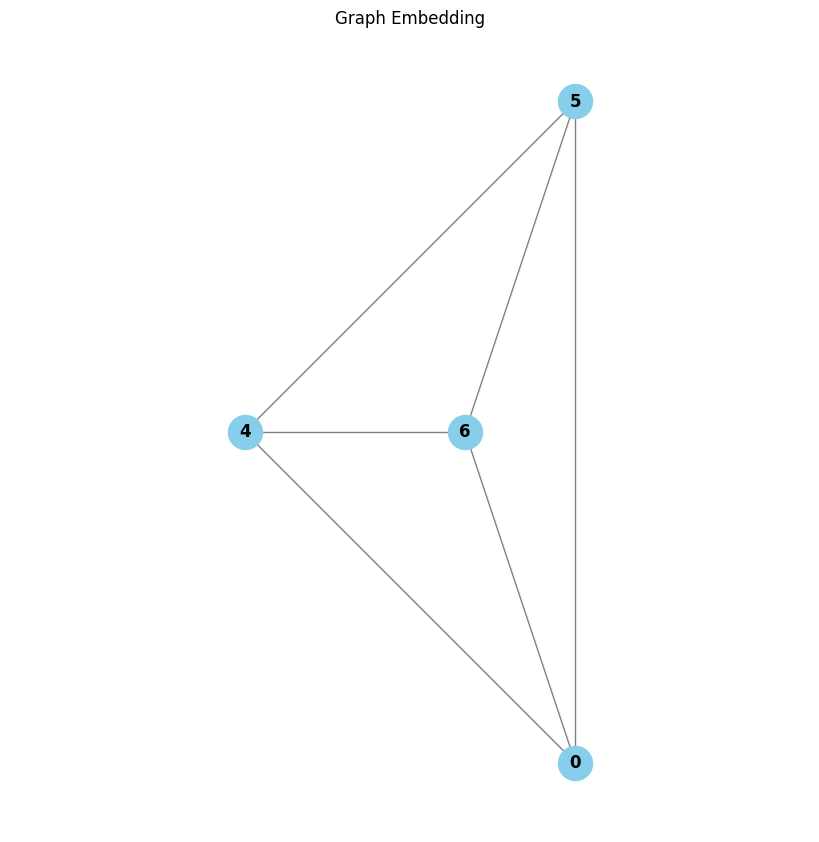

nodos grafo: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges grafo: [(0, 8), (0, 7), (0, 3), (0, 2), (1, 4), (1, 6), (2, 3), (2, 8), (2, 5), (3, 4), (4, 5), (5, 9), (7, 9)]


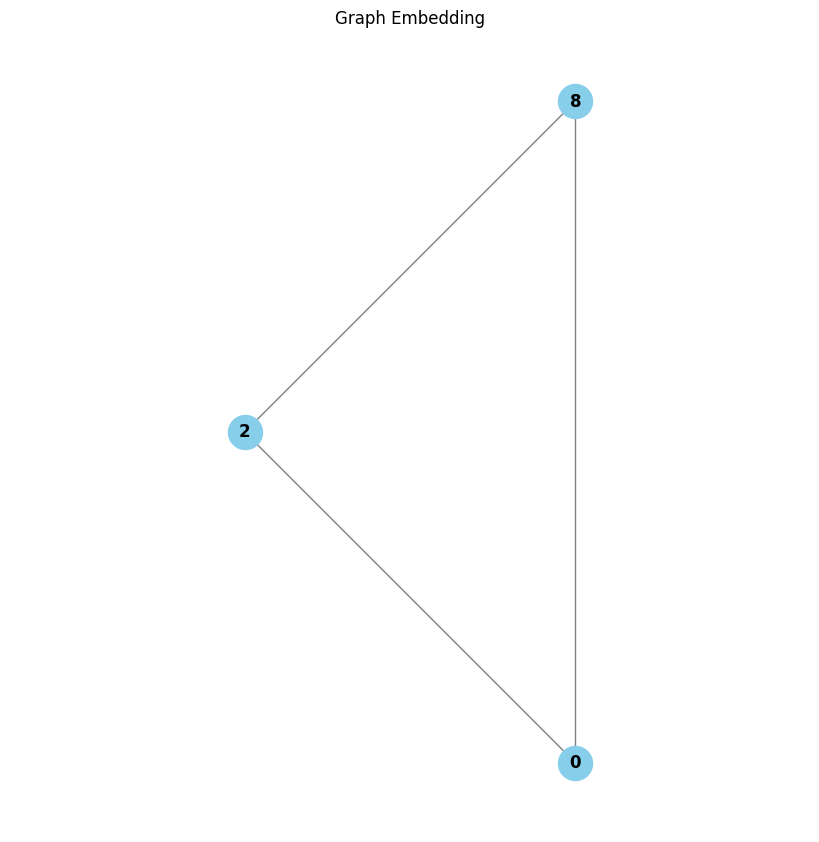

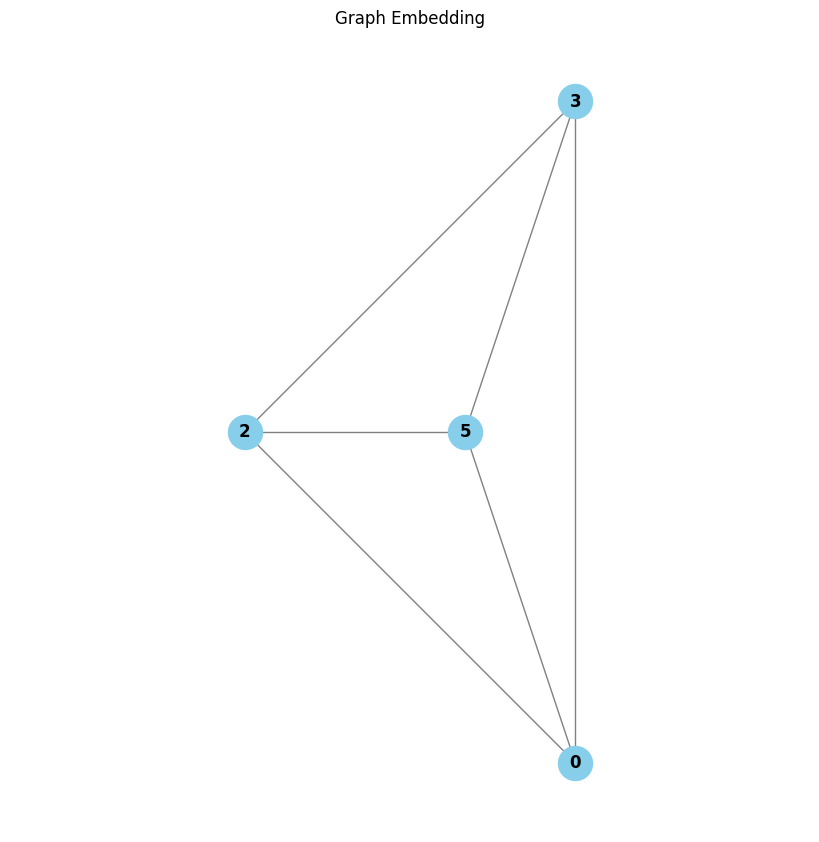

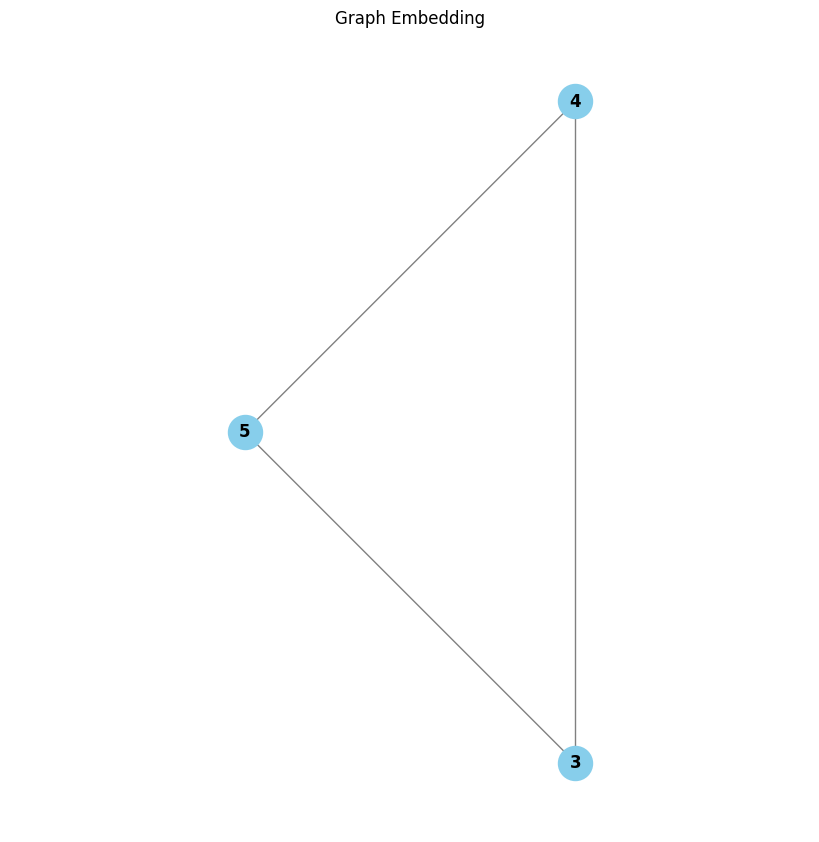

nodos grafo: [0, 1, 2, 3, 4, 5, 6]
edges grafo: [(0, 5), (0, 4), (0, 1), (1, 2), (1, 4), (3, 4), (4, 5)]


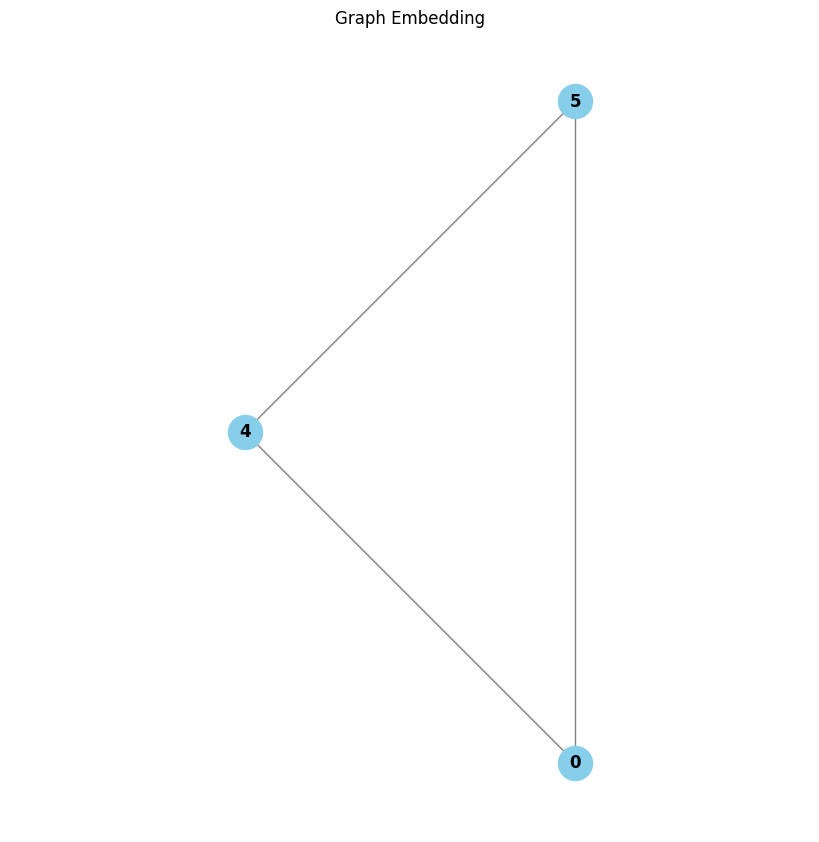

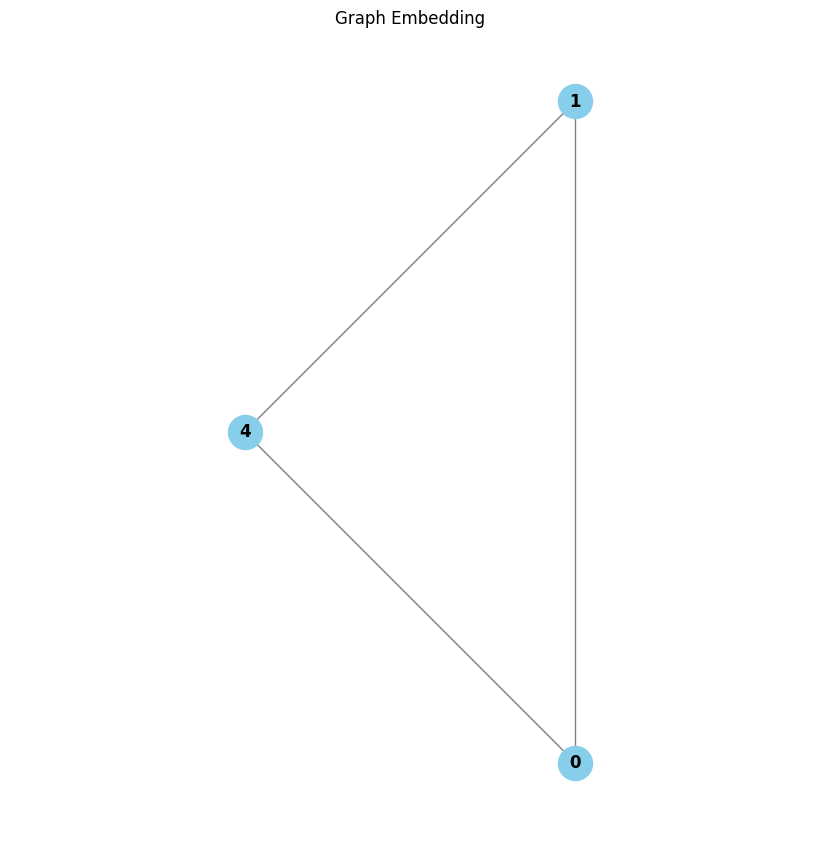

nodos grafo: [0, 1, 2, 3, 4, 5, 6]
edges grafo: [(0, 6), (0, 1), (0, 4), (1, 3), (1, 2), (1, 6), (2, 5), (3, 4), (4, 5)]


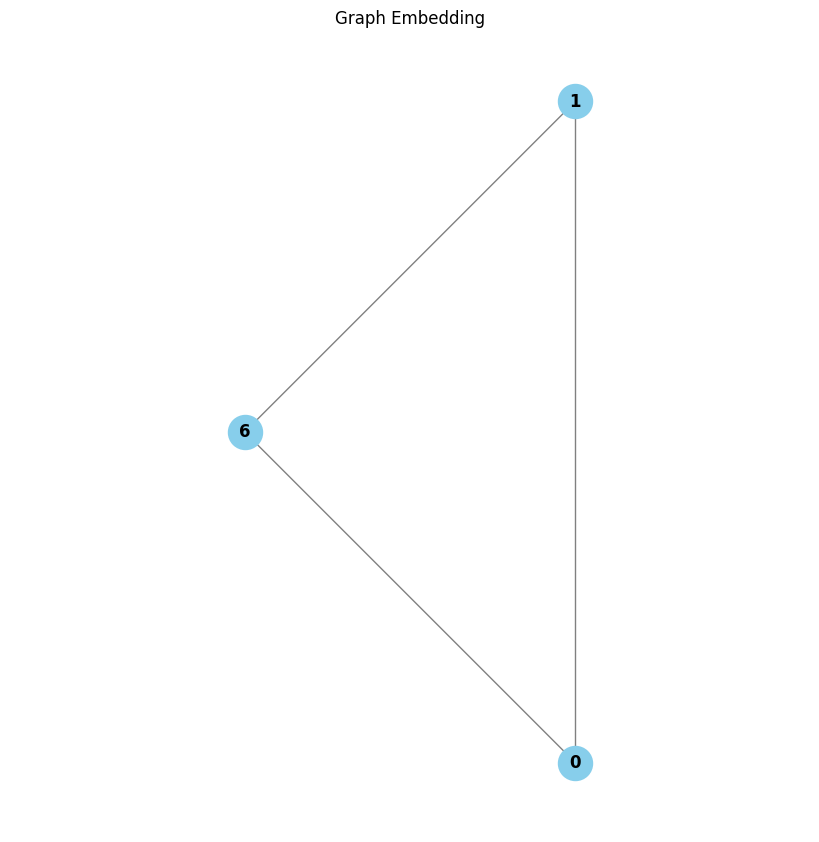

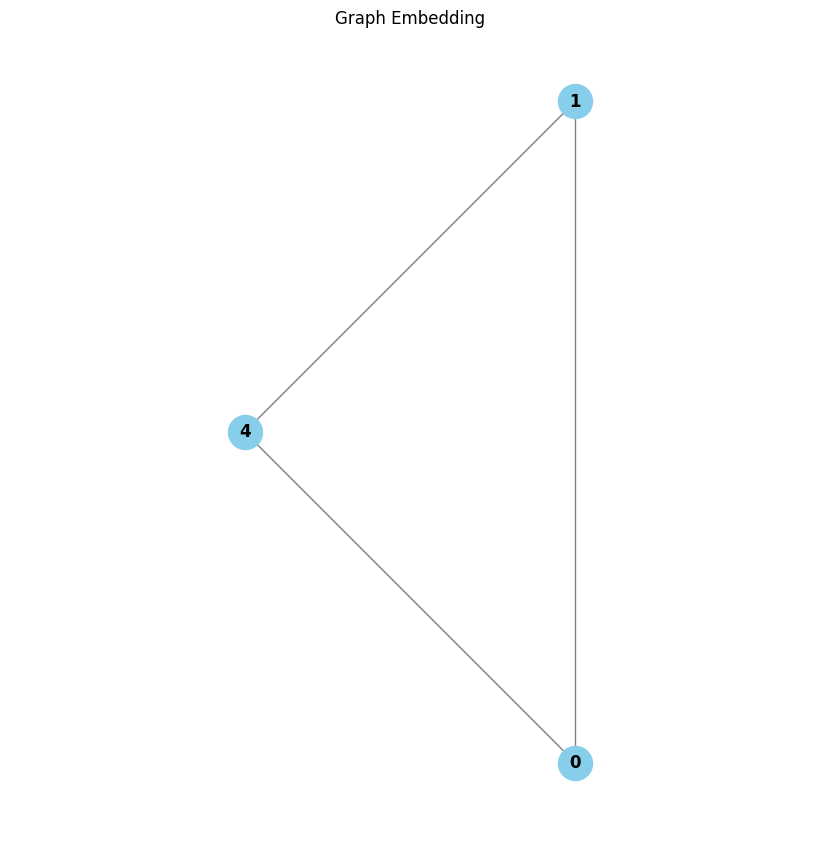

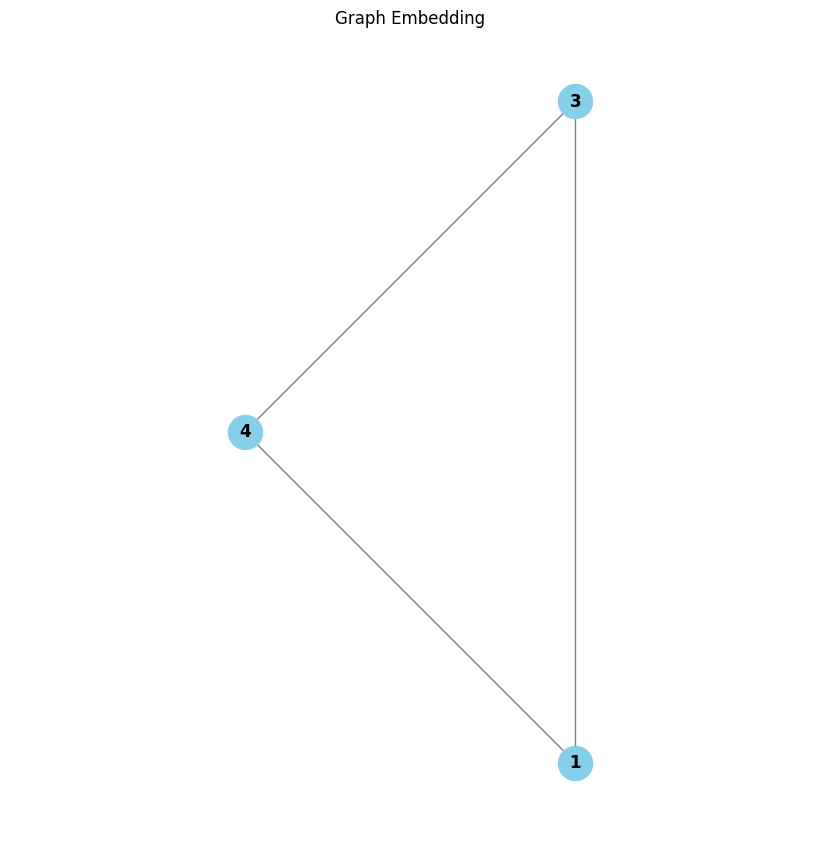

nodos grafo: [0, 1, 2, 3, 4, 5]
edges grafo: [(0, 3), (0, 1), (1, 4), (1, 5), (1, 3), (2, 4), (4, 5)]


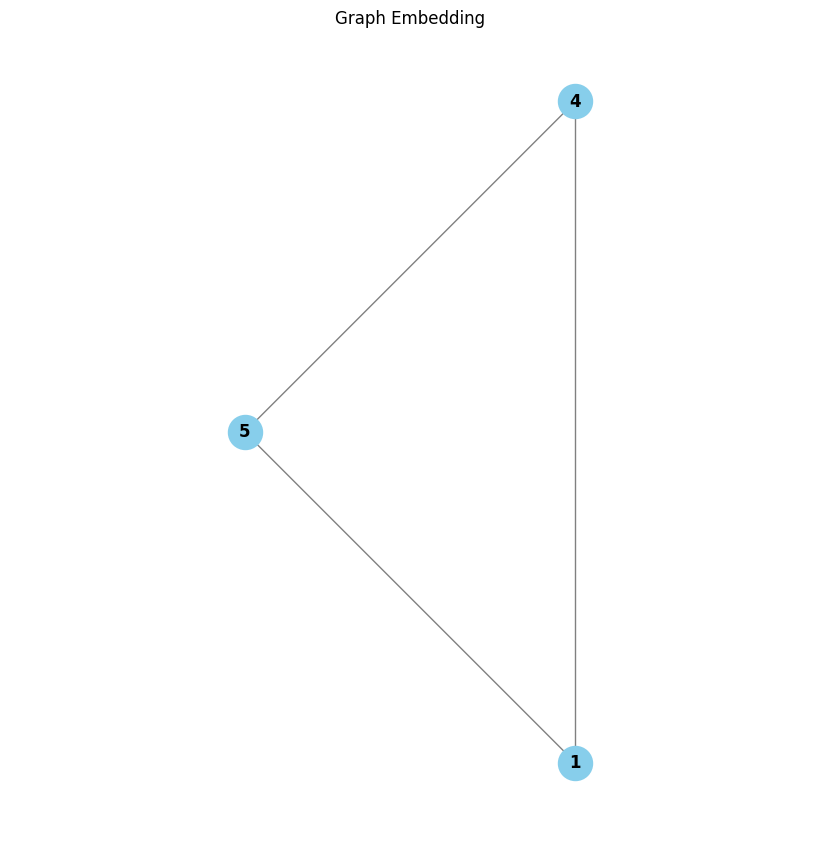

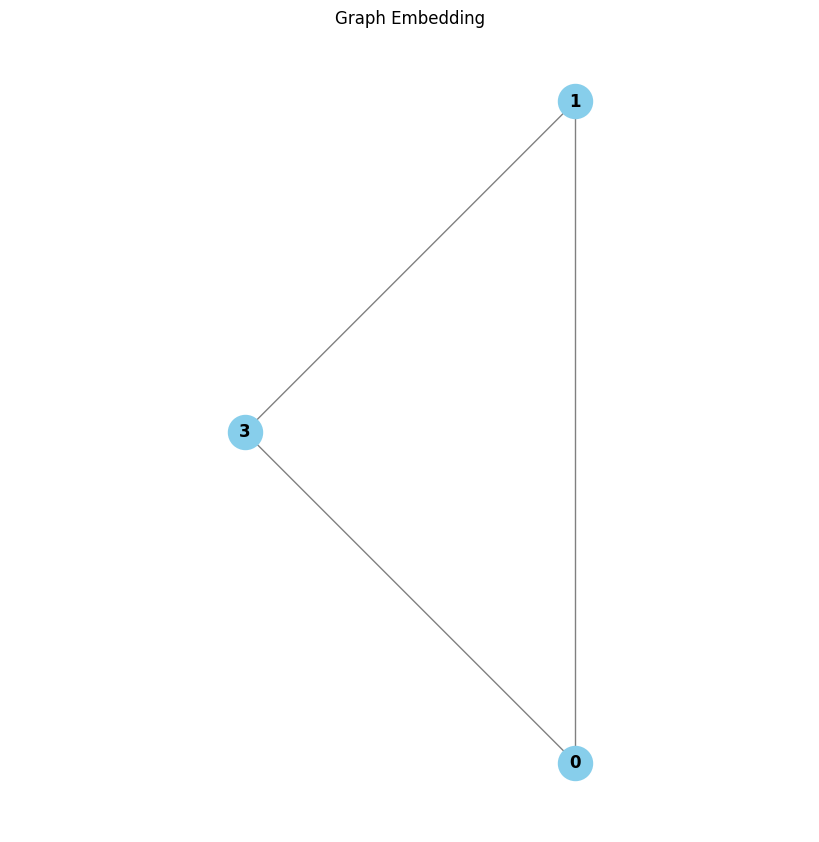

'\n# Test on non-planar graphs\nprint("\nTesting Non-Planar Graphs:")\nfor i, G in enumerate(nonplanar_graphs):\n    # print("nodos grafo:", G.nodes())\n    # print("edges grafo:", G.edges())\n    planar_list, coordinates = planar_printer.get_embbeding(G)\n'

In [3]:

def generate_graphs(num_planar, num_nonplanar, seed=42): ### CON SEED 42 VA BIEN PERO SE PILLA CON LOS QUE NO SON PLANARES.
    """
    Generate a list of planar and non-planar graphs using NetworkX's check_planarity.
    """
    random.seed(seed)
    planar_graphs = []
    nonplanar_graphs = []
    trials = 0

    while len(planar_graphs) < num_planar or len(nonplanar_graphs) < num_nonplanar:
        n = random.randint(5, 10)   # number of nodes
        m = random.randint(n, n * (n - 1) // 2)  # number of edges
        G = nx.gnm_random_graph(n, m, seed=seed + trials)
        
        is_planar, _ = nx.check_planarity(G)
        
        if is_planar and len(planar_graphs) < num_planar:
            planar_graphs.append(G)
        elif not is_planar and len(nonplanar_graphs) < num_nonplanar:
            nonplanar_graphs.append(G)
        
        trials += 1  # change seed for the next trial

    return planar_graphs, nonplanar_graphs

import random
# Generate 5 planar and 5 non-planar graphs
seed = random.randint(1, 100)
planar_graphs, nonplanar_graphs = generate_graphs(10, 10, seed)


# Test on planar graphs
print("Testing Planar Graphs:")
for i, G in enumerate(planar_graphs):
    print("nodos grafo:", G.nodes())
    print("edges grafo:", G.edges())
    
    # tcc, _ = finder.triconnected_comps(G)
    # print("Graph Triconnected Components:")
    # printer.print_n_connected_components(G, tcc, N=3)
    
    planar_list, coordinates = planar_printer.get_embbeding(G)

"""
# Test on non-planar graphs
print("\nTesting Non-Planar Graphs:")
for i, G in enumerate(nonplanar_graphs):
    # print("nodos grafo:", G.nodes())
    # print("edges grafo:", G.edges())
    planar_list, coordinates = planar_printer.get_embbeding(G)
"""
